In [34]:
%matplotlib inline
import pandas as pd

In [35]:
df = pd.read_csv('data/beer.csv', index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<Axes: >

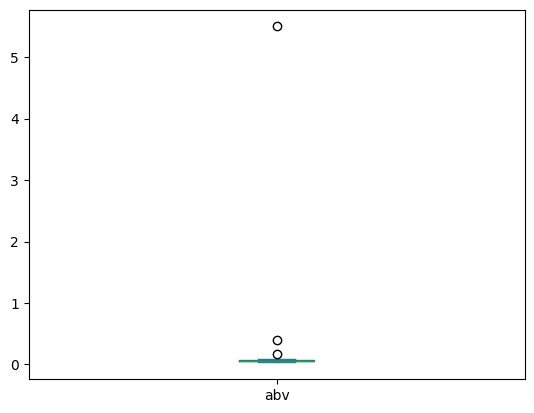

In [36]:
df.plot(kind='box', y='abv')

In [37]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [38]:
df['abv'].quantile(0.25)

np.float64(0.05)

In [39]:
df['abv'].quantile(0.75)

np.float64(0.065)

In [40]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1

In [41]:
condition = (df['abv'] < (q1 - 1.5 * iqr)) | (df['abv'] > (q3 + 1.5 * iqr))

In [42]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [43]:
df.loc[2250, 'abv'] = 0.055

In [44]:
df.loc[2250]

abv                             0.055
ibu                              40.0
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                           12.0
Name: 2250, dtype: object

In [45]:
condition = (df['abv'] < (q1 - 1.5 * iqr)) | (df['abv'] > (q3 + 1.5 * iqr))
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [46]:
df[condition].index

Index([963, 1856], dtype='int64')

In [47]:
df.drop(df[condition].index, inplace=True)
df[condition]

/var/folders/5x/qyhn_rn57c1ckbjg691620fw0000gp/T/ipykernel_29530/1759332483.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[condition]


,abv,ibu,id,name,style,brewery_id,ounces


<Axes: >

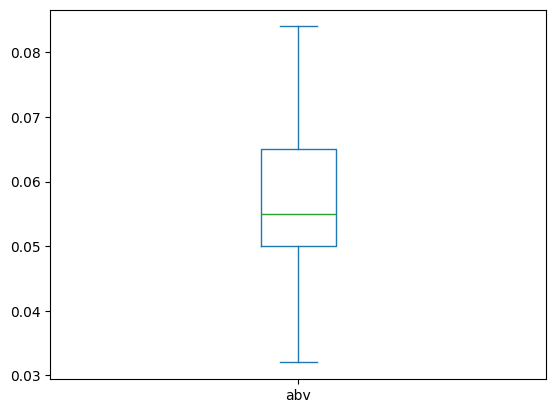

In [48]:
df.plot(kind='box', y='abv')

In [49]:
df = pd.read_csv('data/exam_outlier.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<Axes: xlabel='reading score', ylabel='writing score'>

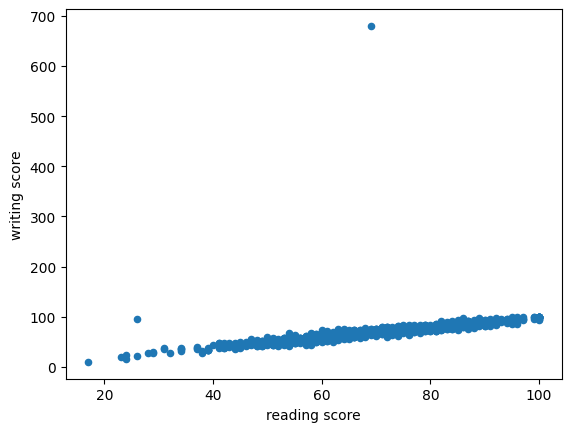

In [50]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [51]:
df[df['writing score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [52]:
df.correlation = df['reading score'].corr(df['writing score'])
df.correlation

np.float64(0.5823781140061426)

In [53]:
df.drop(51, inplace=True)

<Axes: xlabel='reading score', ylabel='writing score'>

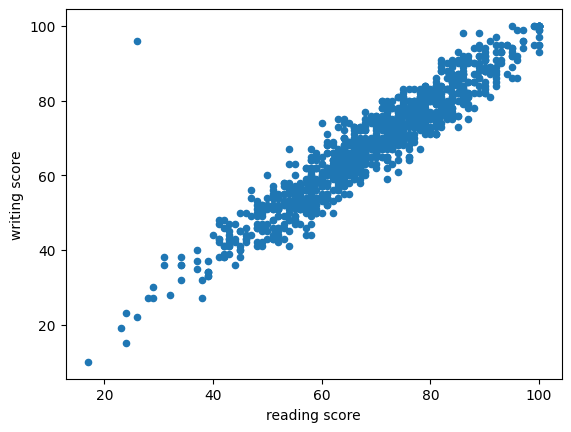

In [54]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [55]:
df.correlation = df['reading score'].corr(df['writing score'])
df.correlation

np.float64(0.9432481998070005)

In [56]:
condition = (df['writing score'] > 90) & (df['reading score'] < 40)
df[condition]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [57]:
df.drop(373, inplace=True)

<Axes: xlabel='reading score', ylabel='writing score'>

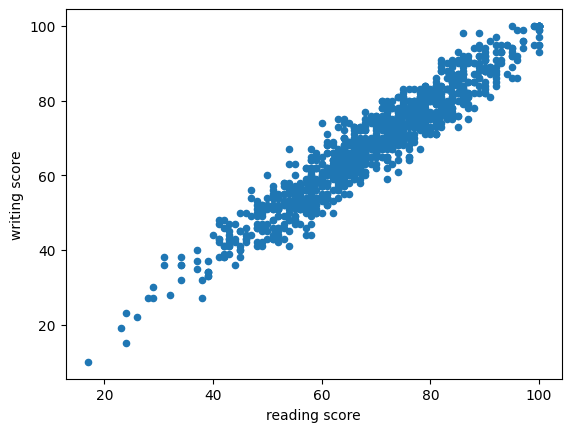

In [58]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [59]:
df.correlation = df['reading score'].corr(df['writing score'])
df.correlation

np.float64(0.954440231900239)

In [61]:
df = pd.read_csv('data/movie_metadata.csv')
df.head()

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,300000000.0,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143


In [62]:
q1 = df['budget'].quantile(0.25)
q3 = df['budget'].quantile(0.75)
iqr = q3 - q1

In [64]:
condition = (df['budget'] > (q3 + 5 * iqr))
df[condition]

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,3.000000e+08,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,2.450000e+08,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,2.500000e+08,8.5,164000,106759
5,John Carter,2012.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,English,USA,2.637000e+08,6.6,24000,1873
6,Spider-Man 3,2007.0,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,English,USA,2.580000e+08,6.2,0,46055
7,Tangled,2010.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,English,USA,2.600000e+08,7.8,29000,2036
8,Avengers: Age of Ultron,2015.0,Action|Adventure|Sci-Fi,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,English,USA,2.500000e+08,7.5,118000,92000
9,Harry Potter and the Half-Blood Prince,2009.0,Adventure|Family|Fantasy|Mystery,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,English,UK,2.500000e+08,7.5,10000,58753
10,Batman v Superman: Dawn of Justice,2016.0,Action|Adventure|Sci-Fi,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,English,USA,2.500000e+08,6.9,197000,24450
18,Pirates of the Caribbean: On Stranger Tides,2011.0,Action|Adventure|Fantasy,Rob Marshall,Johnny Depp,Sam Claflin,Stephen Graham,English,USA,2.500000e+08,6.7,58000,54083


<Axes: xlabel='budget', ylabel='imdb_score'>

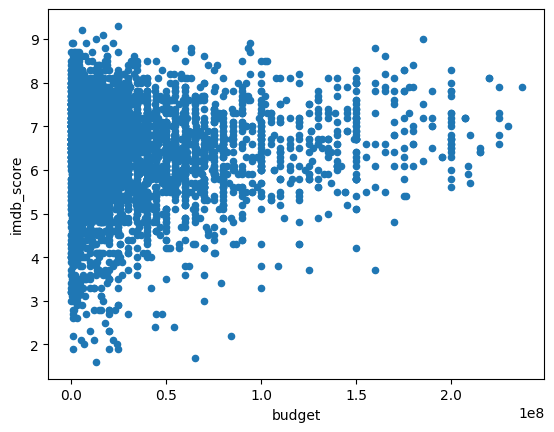

In [65]:
df.drop(df[condition].index, inplace=True)
df.plot(kind='scatter', x='budget', y='imdb_score')

In [66]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

<Axes: xlabel='budget', ylabel='imdb_score'>

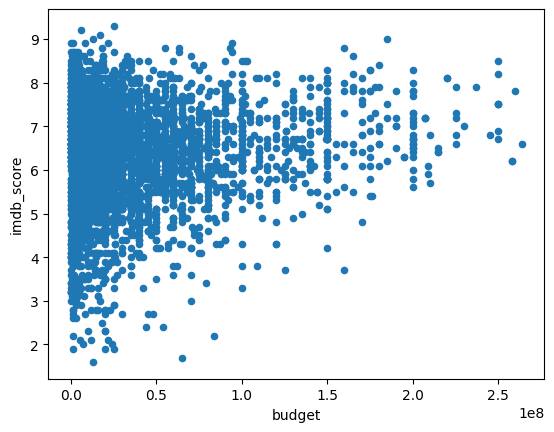

In [70]:
df.plot(kind='scatter', x='budget', y='imdb_score')

In [68]:
condition = df['budget'].sort_values(ascending=False).head(15)
condition

2988    1.221550e+10
3859    4.200000e+09
3005    2.500000e+09
2323    2.400000e+09
2334    2.127520e+09
3423    1.100000e+09
4542    1.000000e+09
3075    7.000000e+08
3851    7.000000e+08
3273    6.000000e+08
1338    5.536320e+08
3311    4.000000e+08
1016    3.900000e+08
2740    3.000000e+08
1       3.000000e+08
Name: budget, dtype: float64

In [69]:
df.drop(condition.index, inplace=True)
df

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143
5,John Carter,2012.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,English,USA,263700000.0,6.6,24000,1873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,English,Canada,NaN,7.7,84,2283
5039,The Following,NaN,Crime|Drama|Mystery|Thriller,NaN,Natalie Zea,Valorie Curry,Sam Underwood,English,USA,NaN,7.5,32000,1753
5040,A Plague So Pleasant,2013.0,Drama|Horror|Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,English,USA,1400.0,6.3,16,0
5041,Shanghai Calling,2012.0,Comedy|Drama|Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,English,USA,NaN,6.3,660,2386


<Axes: xlabel='budget', ylabel='imdb_score'>

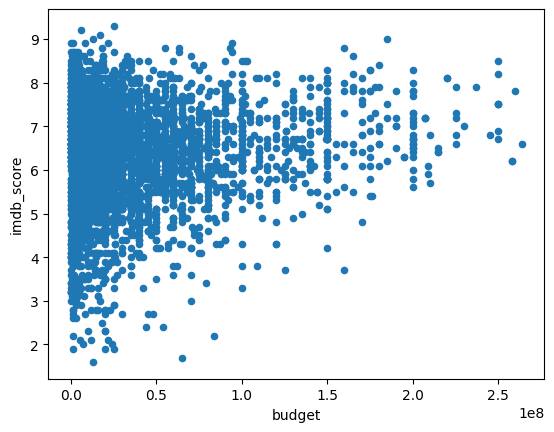

In [71]:
df.plot(kind='scatter', x='budget', y='imdb_score')